# ANÁLISE EXPLORATÓRIA DOS DADOS - PERFIL DO ELEITORADO BRASILEIRO

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import numpy as np

from IPython.display import Image
from IPython.core.display import HTML 



# IMPORTAÇÃO DOS DADOS

## Fonte dos dados
> Foram utilizados dados extraídos diretamente dos órgãos oficiais responsáveis.

`perfil_eleitorado_2022.zip`
> * https://dadosabertos.tse.jus.br/dataset/eleitorado-2022/resource/8a6ff7bd-5a22-4d1a-9353-cce06f9f5e35
> * última atualização: 15 de julho de 2022
> * *dataset* com as informações do eleitorado brasileiro, separados por município.

`bcim_2016_21_11_2018.gpkg`
> * https://www.ibge.gov.br/geociencias/cartas-e-mapas/bases-cartograficas-continuas/
> * última atualização: 12 de novembro de 2022, 08:55 (UTC-03:00)
> * *informações geoespaciais* com todos os pontos de localizações dos municípios do Brasil, extraídos do site do IBGE.


In [2]:
# Carrega a base de dados de abstenção do 1ª turno das eleições 2022.
df = pd.read_csv('raw\perfil_eleitorado_2022.zip', sep=';', encoding='latin1')

# Carrega o arquivo geoespacial disponibilizado pelo governo brasileiro com os pontos cardeais dos municípios
# municipios = gpd.read_file('https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bcim/versao2016/geopackage/bcim_2016_21_11_2018.gpkg', layer = 'LIM_Municipio_A')    # Não vamos utilizar a base de municipios nessa análise
estados = gpd.read_file('https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bcim/versao2016/geopackage/bcim_2016_21_11_2018.gpkg', layer = 'LIM_Unidade_Federacao_A')


## Conhecendo os arquivos


### Vamos começar com a base do TSE com os perfis

In [3]:
# Mostra 10 registros aleatórios
df.sample(10) 

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRICA,DS_MUN_SIT_BIOMETRICA,NR_ZONA,CD_GENERO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
2708444,11/07/2022,22:32:34,2022,PB,20699,LASTRO,1,Biométrico,63,4,...,3,CASADO,7074,70 a 74 anos,6,ENSINO MÉDIO COMPLETO,3,3,0,0
2789181,11/07/2022,22:32:34,2022,SE,31453,FREI PAULO,1,Biométrico,24,2,...,1,SOLTEIRO,7074,70 a 74 anos,1,ANALFABETO,16,16,0,0
553635,11/07/2022,22:32:34,2022,SP,63118,CARAGUATATUBA,1,Biométrico,206,2,...,7,SEPARADO JUDICIALMENTE,5054,50 a 54 anos,6,ENSINO MÉDIO COMPLETO,37,36,1,0
206485,11/07/2022,22:32:34,2022,PE,25151,PEDRA,1,Biométrico,58,2,...,1,SOLTEIRO,2529,25 a 29 anos,7,SUPERIOR INCOMPLETO,37,34,0,0
935463,11/07/2022,22:32:34,2022,PE,23574,CABO DE SANTO AGOSTINHO,1,Biométrico,121,2,...,1,SOLTEIRO,2529,25 a 29 anos,2,LÊ E ESCREVE,47,33,0,0
529822,11/07/2022,22:32:34,2022,PI,12017,SÃO JOSÉ DO PEIXE,1,Biométrico,61,4,...,3,CASADO,3539,35 a 39 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,1,0,0
4169050,11/07/2022,22:32:34,2022,SP,70793,SÃO CARLOS,2,Híbrido,121,4,...,9,DIVORCIADO,6569,65 a 69 anos,1,ANALFABETO,9,6,0,0
3072932,11/07/2022,22:32:34,2022,MA,8036,IMPERATRIZ,1,Biométrico,33,4,...,3,CASADO,5054,50 a 54 anos,2,LÊ E ESCREVE,137,137,0,0
1473242,11/07/2022,22:32:34,2022,CE,13447,CATUNDA,1,Biométrico,54,4,...,1,SOLTEIRO,7074,70 a 74 anos,1,ANALFABETO,22,22,2,0
1658340,11/07/2022,22:32:34,2022,DF,97012,BRASÍLIA,1,Biométrico,2,2,...,3,CASADO,2529,25 a 29 anos,7,SUPERIOR INCOMPLETO,30,27,0,0


> 1. Percebemos algumas colunas importantes, como UF, Município, Faixa Etária, etc;

> 2. Observamos que o dataset possui código e descrição de algumas colunas;

> 3. Observamos que o dataset controla as condições de biometria do município;

> 4. Temos uma coluna de gênero e uma coluna de alteração para nome social.

In [4]:
qtd_original_colunas = df.shape[1]# Guardamos a quantidade para comparativo
qtd_original_linhas = df.shape[0] # Guardamos a quantidade para comparativo

print(f">>>> Existem {qtd_original_linhas} linhas e {qtd_original_colunas} colunas nesse dataset.")

>>>> Existem 4362480 linhas e 21 colunas nesse dataset.


> Isso implica que temos **4.362.480 linhas agrupadas por município**, mas não a quantidade total de eleitores. Precisaremos agrupar novamente, mas somando a coluna QT_ELEITORES_PERFIL para obtermos a quantidade total de eleitores.

In [5]:
df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'CD_MUN_SIT_BIOMETRICA', 'DS_MUN_SIT_BIOMETRICA',
       'NR_ZONA', 'CD_GENERO', 'DS_GENERO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA', 'DS_FAIXA_ETARIA',
       'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL',
       'QT_ELEITORES_BIOMETRIA', 'QT_ELEITORES_DEFICIENCIA',
       'QT_ELEITORES_INC_NM_SOCIAL'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362480 entries, 0 to 4362479
Data columns (total 21 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRICA       int64 
 7   DS_MUN_SIT_BIOMETRICA       object
 8   NR_ZONA                     int64 
 9   CD_GENERO                   int64 
 10  DS_GENERO                   object
 11  CD_ESTADO_CIVIL             int64 
 12  DS_ESTADO_CIVIL             object
 13  CD_FAIXA_ETARIA             int64 
 14  DS_FAIXA_ETARIA             object
 15  CD_GRAU_ESCOLARIDADE        int64 
 16  DS_GRAU_ESCOLARIDADE        object
 17  QT_ELEITORES_PERFIL         int64 
 18  QT_ELEITORES_BIOMETRIA      int64 
 19  QT_ELEITORES_DEFICIENCIA    int64 
 20  QT

<table>
<thead>
	<tr>
		<th>Variável</th>
		<th>Descrição</th>
	</tr>
</thead>
<tbody>
	<tr>
		<td>DT_GERACAO</td>
		<td>Data da extração dos dados para geração do arquivo.
</td>
	</tr>
	<tr>
		<td>HH_GERACAO</td>
		<td>Hora da extração dos dados para geração do arquivo com
base no horário de Brasília.</td>
	</tr>
	<tr>
		<td>ANO_ELEICAO</td>
		<td>Ano de referência da eleição para geração do arquivo.
</td>
	</tr>
	<tr>
		<td>SG_UF</td>
		<td>Sigla da Unidade da Federação do eleitor.
</td>
	</tr>
	<tr>
		<td>NM_MUNICIPIO</td>
		<td>Nome do município onde vota o eleitor.
</td>
	</tr>
	<tr>
		<td>DS_GENERO</td>
		<td>Descrição do gênero do eleitor.
</td>
	</tr>
</tbody>
</table>


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ANO_ELEICAO,4362480.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
CD_MUNICIPIO,4362480.0,51857.960753,28447.422027,19.0,26310.0,54313.0,75892.0,99473.0
CD_MUN_SIT_BIOMETRICA,4362480.0,1.218871,0.454842,0.0,1.0,1.0,1.0,2.0
NR_ZONA,4362480.0,98.074376,91.647966,1.0,29.0,69.0,139.0,427.0
CD_GENERO,4362480.0,3.043369,1.017867,0.0,2.0,4.0,4.0,4.0
CD_ESTADO_CIVIL,4362480.0,3.862760,2.843293,0.0,1.0,3.0,5.0,9.0
CD_FAIXA_ETARIA,4362480.0,5333.222117,2144.723310,-3.0,3539.0,5559.0,7074.0,9999.0
CD_GRAU_ESCOLARIDADE,4362480.0,4.283655,2.216055,0.0,2.0,4.0,6.0,8.0
QT_ELEITORES_PERFIL,4362480.0,35.863548,126.918557,1.0,2.0,5.0,21.0,7187.0
QT_ELEITORES_BIOMETRIA,4362480.0,27.083660,103.594934,0.0,1.0,3.0,14.0,6364.0


In [8]:
df.describe(exclude = 'number').T

,count,unique,top,freq
DT_GERACAO,4362480,1,11/07/2022,4362480
HH_GERACAO,4362480,1,22:32:34,4362480
SG_UF,4362480,28,SP,648813
NM_MUNICIPIO,4362480,5466,SÃO PAULO,69222
DS_MUN_SIT_BIOMETRICA,4362480,3,Biométrico,3250983
DS_GENERO,4362480,3,FEMININO,2296524
DS_ESTADO_CIVIL,4362480,6,SOLTEIRO,1434310
DS_FAIXA_ETARIA,4362480,23,55 a 59 anos,361283
DS_GRAU_ESCOLARIDADE,4362480,9,ENSINO FUNDAMENTAL INCOMPLETO,734753


> Entendemos que o arquivo contém dados de **4.362.480 linhas**, separadas por informações únicas dos municípios, com colunas númerias e categóricas; 

> O arquivo consolida o número de eleitores separados por faixa etária, grau de escolaridade, estado civil, etc;

> Precisamos mais a frente fazer um cálculo somando todos eleitores para descobrir a quantidade total, chegando no número que o TSE divulgou de **156.454.011 de eleitores aptos a votar**. Dessa forma teremos certeza que estamos trabalhando com a base efetiva.

### Vamos olhar o arquivo de estados

In [9]:
estados.sample(10)

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
16,Rio de Janeiro,None,Sim,RJ,33,1000001,None,73.0,None,None,None,"MULTIPOLYGON (((-41.70343 -22.42014, -41.70380..."
5,Alagoas,None,Sim,AL,27,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ..."
17,Amapá,None,Sim,AP,16,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-51.18178 3.90573, -51.13631 3..."
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."
7,Roraima,None,Sim,RR,14,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5..."
9,Acre,None,Sim,AC,12,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ..."
21,Mato Grosso,None,Sim,MT,51,1000001,None,73.0,None,None,None,"MULTIPOLYGON (((-60.10041 -12.91271, -60.09773..."
26,Rio Grande do Sul,None,Sim,RS,43,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-53.03425 -27.15455, -53.03079..."
10,Rondônia,None,Sim,RO,11,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-62.79892 -8.02312, -62.78622 ..."
15,Santa Catarina,None,Sim,SC,42,1000001,None,73.0,None,None,None,"MULTIPOLYGON (((-48.63761 -25.97490, -48.63504..."


> Essa é a base do IBGE que contém o mapeamento geoespacial das bases cartográficas do Brasil, com os pontos de latitude e longitude para plotagem de mapas. Será utilizada para o cruzamento com a base de eleitorado.

# ESTRUTURA DOS DADOS


## Correções e alterações

In [10]:
# Renomear os campos para fazer o merge entre os df para pegar latitude e longitude dos estados.
estados.rename(columns={'sigla': 'SG_UF'}, inplace=True)

In [11]:
# Fazemos o merge entre a base de eleitores e de estados.
df = df.merge(estados, on = 'SG_UF', how = 'left')

# Conferimos novamente que a base continua com o mesmo tamanho
print(f">>>> Temos um total de {df.shape[0]} linhas. \n>>>> No total, tivemos uma diferença de {qtd_original_linhas - df.shape[0]} linhas após o cruzamento.")

>>>> Temos um total de 4362480 linhas. 
>>>> No total, tivemos uma diferença de 0 linhas após o cruzamento.


> Conferimos que o cruzamento entre as bases deu certo, então agora temos a base das abstenções com os pontos de latitude e longitude. Com isso podemos continuar a preparação dos dados e começar a pensar na nossa análise.

# VISÃO GERAL

In [12]:
# Agrupamos o dataframe por UF somando a quantidade de eleitores (QT_ELEITORES_PERFIL),
# pois identificamos que o arquivo está separado por faixa etária, genero, grau de escolaridade, etc.

# Dessa forma teremos uma linha por UF com o total de eleitores
# Vamos apresentar os dados por milhão, para facilitar a visualização

df_uf = df.groupby(['SG_UF'], as_index=False)['QT_ELEITORES_PERFIL'].sum().sort_values(by='QT_ELEITORES_PERFIL',  ascending=False)
df_uf['QT_ELEITORES_PERFIL'] = (df_uf['QT_ELEITORES_PERFIL'] / 1000000).round(2)
df_uf['QT_ELEITORES_PERFIL_PERC'] = df_uf['QT_ELEITORES_PERFIL'] / df_uf['QT_ELEITORES_PERFIL'].sum()
df_uf['QT_ELEITORES_PERFIL_PERC_100'] = (df_uf['QT_ELEITORES_PERFIL_PERC'] * 100).round(1)
df_uf['QT_ELEITORES_PERFIL_PERC_100_GRAFICO'] = df_uf['QT_ELEITORES_PERFIL_PERC_100'].apply(str) + '%'

df_uf

,SG_UF,QT_ELEITORES_PERFIL,QT_ELEITORES_PERFIL_PERC,QT_ELEITORES_PERFIL_PERC_100,QT_ELEITORES_PERFIL_PERC_100_GRAFICO
25,SP,34.67,0.221604,22.2,22.2%
10,MG,16.29,0.104123,10.4,10.4%
18,RJ,12.83,0.082007,8.2,8.2%
4,BA,11.29,0.072164,7.2,7.2%
22,RS,8.59,0.054906,5.5,5.5%
17,PR,8.48,0.054203,5.4,5.4%
15,PE,7.02,0.044871,4.5,4.5%
5,CE,6.82,0.043592,4.4,4.4%
13,PA,6.08,0.038862,3.9,3.9%
23,SC,5.49,0.035091,3.5,3.5%


In [13]:
# Fazemos um merge entre o df que criamos com a soma dos eleitores entre os estados, 
# e a base do IBGE, para conseguir os pontos geoespaciais para plotar o gráfico

df_uf = pd.merge(df_uf,estados[['SG_UF','geometry']],on='SG_UF', how='left')
df_uf = df_uf.dropna()

In [14]:
# Aqui nós separamos a base de dados e criamos o objeto do Geopandas
populacao_brasil = df_uf[['SG_UF','QT_ELEITORES_PERFIL_PERC_100','QT_ELEITORES_PERFIL_PERC_100_GRAFICO','geometry']]
gdf_populacao = gpd.GeoDataFrame(populacao_brasil, geometry='geometry')

In [1]:
# Montamos a figura e plotamos o mapa com o matplotlib
fig, ax = plt.subplots(figsize=(18, 12), 
                       subplot_kw=dict(aspect='equal'))
plt.gcf().text(0.15, .89, "ELEITORADO - 2022", fontsize = 30, color='Black' ,ha='left', va='center', weight="bold")
plt.gcf().text(0.15, .86, "Distribuição dos eleitores brasileiros em porcentagem %", fontsize = 15, color='Black' ,ha='left', va='center')

gdf_populacao.plot(column='QT_ELEITORES_PERFIL_PERC_100', 
                   scheme='natural_breaks', 
                   k=10, 
                   cmap='BuPu', 
                   edgecolor='white',
                   linewidth=.5,
                   #legend=True, 
                   #legend_kwds={'loc': 'lower left'},
                   ax=ax,
                  )

gdf_populacao.apply(lambda x: ax.annotate(text=x['QT_ELEITORES_PERFIL_PERC_100_GRAFICO'], 
                                          xy=x.geometry.centroid.coords[0], 
                                          ha='center', 
                                          fontsize = 13, 
                                          bbox=dict(boxstyle="Circle",
                                                   alpha=0.7,
                                                   ec=(0.94902, 0.94902, 0.94902),
                                                   fc=(0.94902, 0.94902, 0.94902),
                                                   )
                                         ), 
                   axis=1)

gdf_populacao.apply(lambda x: ax.annotate(text=x.SG_UF, 
                                          xy=x.geometry.centroid.coords[0], 
                                          xytext=(0,25), 
                                          textcoords='offset pixels', 
                                          fontsize = 15, 
                                          ha='center', 
                                          color = "black", 
                                          weight='semibold'), 
                    axis=1)
plt.axis('off')
plt.show()


NameError: name 'plt' is not defined

In [16]:
# Calcular o total de eleitores
total_eleitores = df['QT_ELEITORES_PERFIL'].sum()
print(f">>>> Temos um total de {total_eleitores} eleitores.")

>>>> Temos um total de 156454011 eleitores.


> Somando todas as linhas temos um total de **156.454.011** eleitores no Brasil, batendo com o número divulgado pelo TSE.


In [17]:
# Preparando o gráfico de pizza
# Agrupando e somando os eleitores por estado
agrupado_UF = df.groupby(['SG_UF'], as_index=False)['QT_ELEITORES_PERFIL'].sum().sort_values(by='QT_ELEITORES_PERFIL',  ascending=False)
agrupado_UF['perc'] = agrupado_UF['QT_ELEITORES_PERFIL'] / agrupado_UF['QT_ELEITORES_PERFIL'].sum()

agrupado_sp = agrupado_UF[agrupado_UF['SG_UF'] == 'SP']
BR_sem_SP = agrupado_UF[~((agrupado_UF['SG_UF'] == "SP"))]
agrupado_sem_SP = BR_sem_SP.groupby(['SG_UF'], as_index=False)['QT_ELEITORES_PERFIL'].sum().sort_values(by='QT_ELEITORES_PERFIL',  ascending=False)

# Montando variáveis de porcentagem
agrupado_sp_perc = (agrupado_sp['QT_ELEITORES_PERFIL'].sum() / agrupado_UF['QT_ELEITORES_PERFIL'].sum())*100
sp_eleitores = agrupado_sp['QT_ELEITORES_PERFIL'].sum()
agrupado_br_perc = (agrupado_sem_SP['QT_ELEITORES_PERFIL'].sum() / agrupado_UF['QT_ELEITORES_PERFIL'].sum())*100
br_eleitores = agrupado_sem_SP['QT_ELEITORES_PERFIL'].sum()

agrupado_UF.loc[(agrupado_UF['SG_UF'] == 'SP') | (agrupado_UF['SG_UF'] == 'MG') | (agrupado_UF['SG_UF'] == 'RJ')]

# Cria as variáveis sem os estados que serão apresentados no gráfico
br_sem_sp_mg_rj = agrupado_UF[~((agrupado_UF['SG_UF'] == 'SP') | (agrupado_UF['SG_UF'] == 'MG') | (agrupado_UF['SG_UF'] == 'RJ'))]
br_sem_ba_pr_rs = agrupado_UF[~((agrupado_UF['SG_UF'] == 'BA') | (agrupado_UF['SG_UF'] == 'PR') | (agrupado_UF['SG_UF'] == 'RS'))]

sp_br = [agrupado_UF['perc'][25],agrupado_UF['perc'][10],agrupado_UF['perc'][18], br_sem_sp_mg_rj['perc'].sum()]
ba_rs_pr = [agrupado_UF['perc'][4],agrupado_UF['perc'][22],agrupado_UF['perc'][17], br_sem_ba_pr_rs['perc'].sum()]
legenda_sp = ['São Paulo','Minas Gerais','Rio de Janeiro','Outros estados']
legenda_ba = ['Bahia','Rio Grande do Sul','Paraná','Outros estados'] 

explodir = [0.2, 0, 0, 0]
explodir_gf2 = [0.2, 0.2, 0.2, 0]
# Estado com maior número de eleitores é SP
print(f'>>>> São Paulo tem um total de {sp_eleitores:.0f} ({agrupado_sp_perc:.0f}%) eleitores do país.')
print(f'>>>> O restante do Brasil tem um total de {br_eleitores:.0f} ({agrupado_br_perc:.0f}%) dos eleitores do país.')


>>>> São Paulo tem um total de 34667793 (22%) eleitores do país.
>>>> O restante do Brasil tem um total de 121786218 (78%) dos eleitores do país.


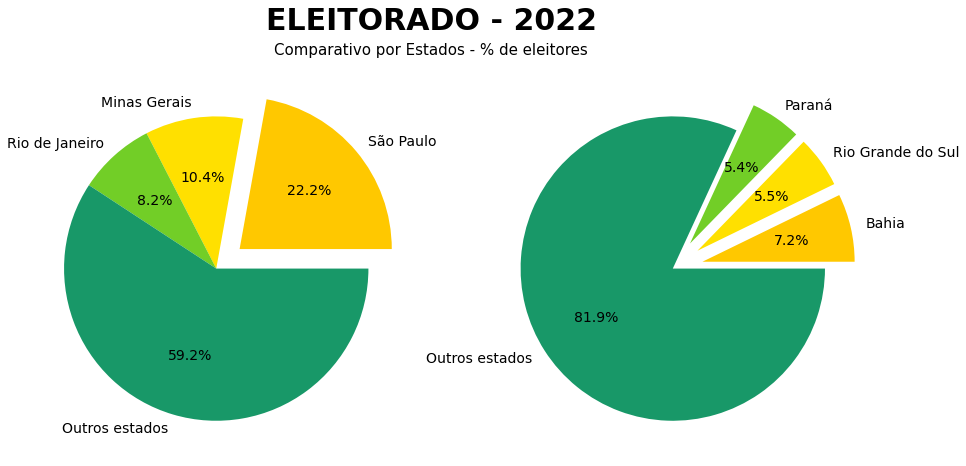

In [18]:
figura = plt.figure(figsize=(15,20))

figura.add_subplot(2,2,1)
plt.pie(sp_br, 
        labels = legenda_sp, 
        explode = explodir,
        autopct='%1.1f%%', 
        textprops={'fontsize': 14},
        colors=["#ffc800", "#FFE000", "#72CE27","#189868"])
figura.add_subplot(2,2,2)

plt.pie(ba_rs_pr, 
        labels = legenda_ba, 
        explode = explodir_gf2,
        autopct='%1.1f%%', 
        textprops={'fontsize': 14},
        colors=["#ffc800", "#FFE000", "#72CE27","#189868"])

plt.gcf().text(.5, 
               .88, "ELEITORADO - 2022", 
               fontsize = 30, 
               color='Black',
               ha='center', 
               va='center',
               weight="bold")
plt.gcf().text(.5, .86, "Comparativo por Estados - % de eleitores", fontsize = 15, color='Black' ,ha='center', va='center')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


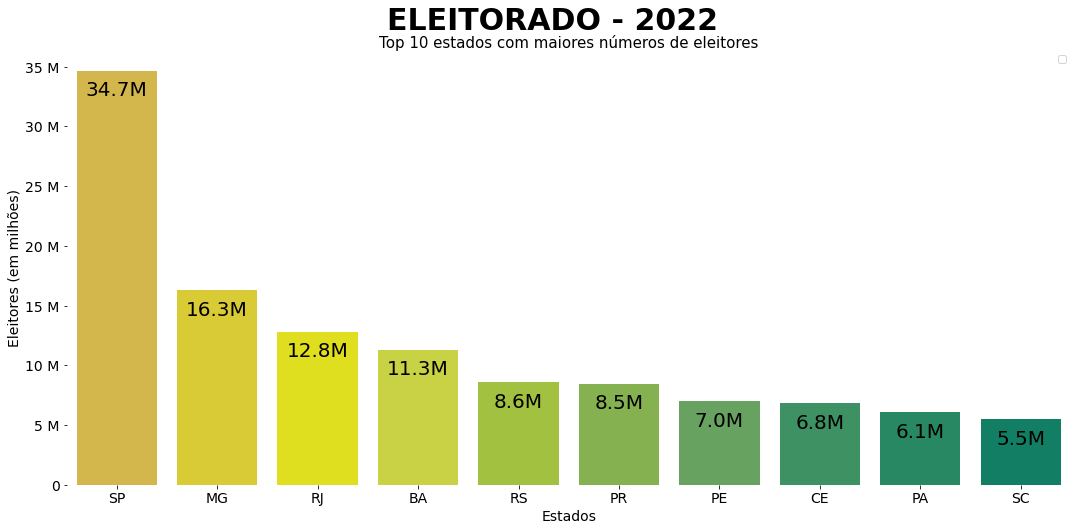

In [19]:
# Setando os 2 eixos para o gráfico
eixo_x = agrupado_UF['SG_UF'].head(10)
eixo_y = agrupado_UF['QT_ELEITORES_PERFIL'].head(10)

# Montando o setup e plotando o gráfico
cores = ["#eac435","#f4e21a","#ffff00","#dee92c","#afd62b","#87c141","#5fad56","#2f9f62","#189868","#00916e"]

fig = plt.figure(figsize=(18,8))
plot = sns.barplot(x=eixo_x,y=eixo_y, palette=cores)
plt.gcf().text(.5, .93, "ELEITORADO - 2022", fontsize = 30, color='Black' ,ha='center', va='center', weight='bold')
plt.title("Top 10 estados com maiores números de eleitores", fontsize = 15, ha='center', va='center')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Estados", size = 14)
plt.ylabel("Eleitores (em milhões)", size = 14)

plot.legend(bbox_to_anchor=(1, 1), ncol=1)
plot.set_frame_on(False)
plot.yaxis.set_major_formatter(ticker.EngFormatter())

for i in plot.patches:
    plot.annotate("{:.1f}M".format(i.get_height()/1000000),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='top', fontsize='20',
                  color='black', xytext=(0,-10),
                  textcoords='offset points')          
plt.show()

## Análise por gênero

In [20]:
# Monto o dataset de gênero, agrupando por UF
df_genero = df.groupby(['SG_UF', 'DS_GENERO'], as_index=False)['QT_ELEITORES_PERFIL'].sum().sort_values(by='QT_ELEITORES_PERFIL',  ascending=False)
df_genero['QT_ELEITORES_PERFIL_MILHAO'] = (df_genero['QT_ELEITORES_PERFIL'] / 1000000).round(2)
df_genero['QT_ELEITORES_PERFIL_PERC'] = df_genero['QT_ELEITORES_PERFIL'] / df_genero['QT_ELEITORES_PERFIL'].sum()
df_genero['QT_ELEITORES_PERFIL_PERC_100'] = (df_genero['QT_ELEITORES_PERFIL_PERC'] * 100).round(1)
df_genero['QT_ELEITORES_PERFIL_PERC_100_GRAFICO'] = df_genero['QT_ELEITORES_PERFIL_PERC_100'].apply(str) + '%'

genero = df.groupby(['DS_GENERO'], as_index=False)['QT_ELEITORES_PERFIL'].sum().sort_values(by='QT_ELEITORES_PERFIL',  ascending=False)
# genero['QT_ELEITORES_PERFIL'] = (genero['QT_ELEITORES_PERFIL'] / 1000000).round(2)
genero['QT_ELEITORES_PERFIL_PERC'] = genero['QT_ELEITORES_PERFIL'] / genero['QT_ELEITORES_PERFIL'].sum()
genero['QT_ELEITORES_PERFIL_PERC_100'] = (genero['QT_ELEITORES_PERFIL_PERC'] * 100).round(1)
genero['QT_ELEITORES_PERFIL_PERC_100_GRAFICO'] = genero['QT_ELEITORES_PERFIL_PERC_100'].apply(str) + '%'
genero


,DS_GENERO,QT_ELEITORES_PERFIL,QT_ELEITORES_PERFIL_PERC,QT_ELEITORES_PERFIL_PERC_100,QT_ELEITORES_PERFIL_PERC_100_GRAFICO
0,FEMININO,82373164,0.526501,52.7,52.7%
1,MASCULINO,74044065,0.473264,47.3,47.3%
2,NÃO INFORMADO,36782,0.000235,0.0,0.0%


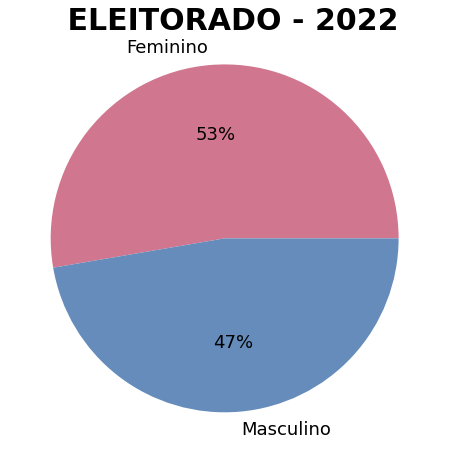

In [21]:
genero_perc = [genero['QT_ELEITORES_PERFIL_PERC_100'][0],genero['QT_ELEITORES_PERFIL_PERC_100'][1]]
legenda = ['Feminino','Masculino']

figura = plt.figure(figsize=(8,8))

plt.pie(genero_perc, 
        labels = legenda, 
        autopct='%1.f%%', 
        textprops={'fontsize': 18},
        colors=['#d1768f','#658cbb'])

plt.gcf().text(.5, .88, "   ELEITORADO - 2022", fontsize = 30, color='Black' ,ha='center', va='center', weight='bold')
plt.show()

In [22]:
# Crio a distribuição entre Faixa etária e o gênero
pd.crosstab(df.DS_FAIXA_ETARIA, df.DS_GENERO, normalize='index')

DS_GENERO,FEMININO,MASCULINO,NÃO INFORMADO
DS_FAIXA_ETARIA,,,
100 anos ou mais,0.501533,0.481854,0.016613
16 anos,0.511967,0.488033,0.000000
17 anos,0.519423,0.480577,0.000000
18 anos,0.522866,0.477134,0.000000
19 anos,0.533326,0.466674,0.000000
20 anos,0.538331,0.461669,0.000000
21 a 24 anos,0.554547,0.445453,0.000000
25 a 29 anos,0.541755,0.458245,0.000000
30 a 34 anos,0.533318,0.466682,0.000000


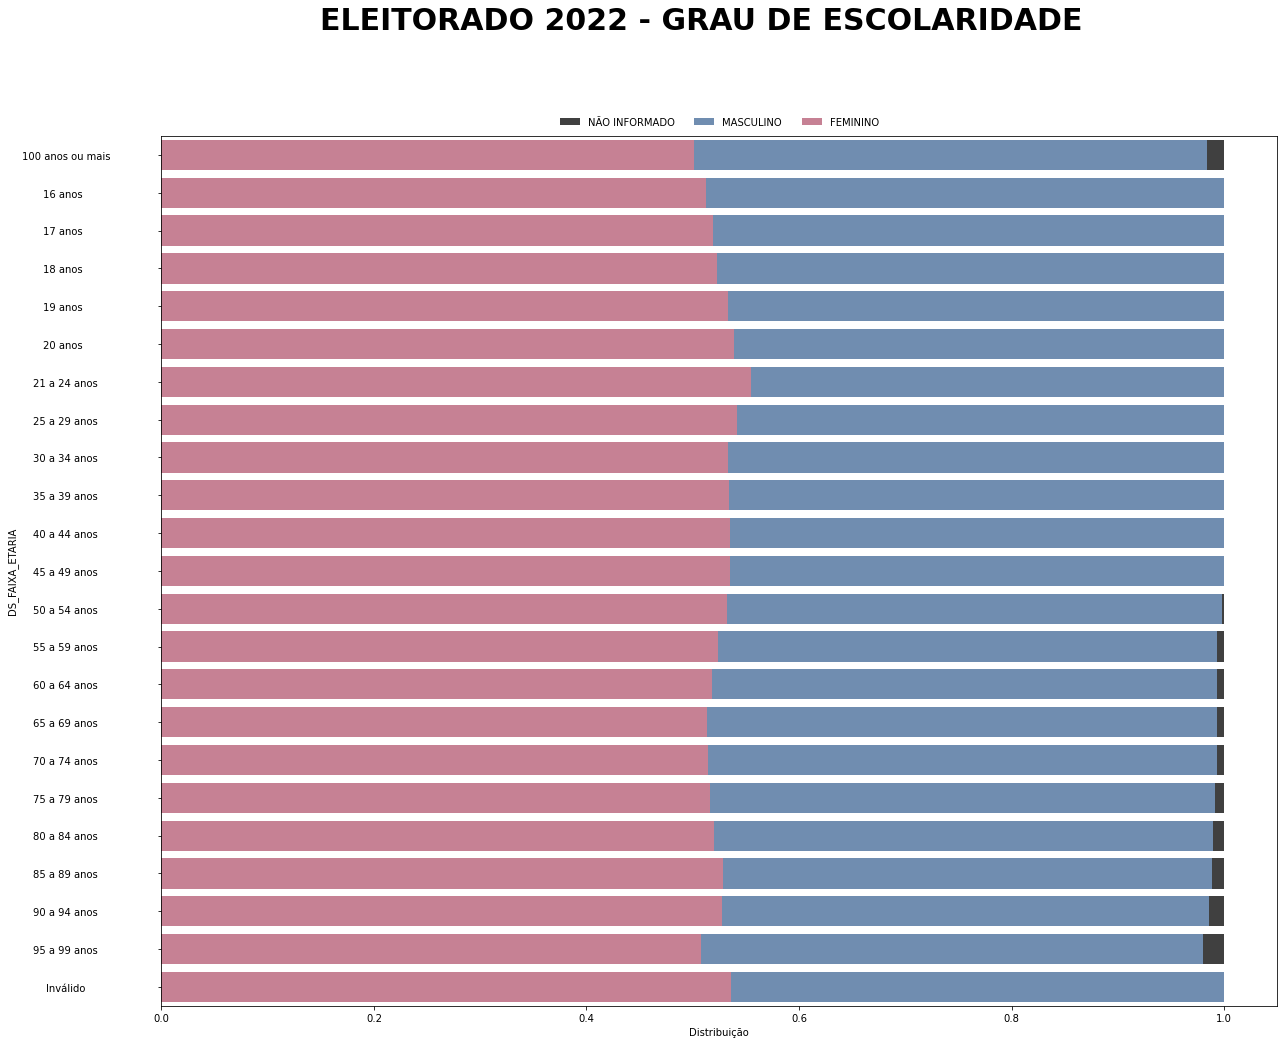

In [23]:
# Calculo a distribuição entre faixa etária e gênero para plotar o gráfico
distribution = pd.crosstab(df.DS_FAIXA_ETARIA, df.DS_GENERO, normalize='index')
colors=['#404040','#658cbb', '#d1768f' ]

figura = plt.figure(figsize=(20,16))
plot = sns.barplot(data=distribution.cumsum(axis=1).stack().reset_index(name='Distribuição'),
            x='Distribuição', 
            y='DS_FAIXA_ETARIA', 
            hue='DS_GENERO', 
            palette=colors,
            hue_order = distribution.columns[::-1],  
            dodge=False)

plt.gcf().text(.5, 0.98, "ELEITORADO 2022 - GRAU DE ESCOLARIDADE", fontsize = 30, color='Black' ,ha='center', va='center', weight='bold')
sns.move_legend(
    plot, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

'''
for i in plot.patches:
    plot.annotate("{:.2f}".format(i.get_width()),
                  (i.get_width()-i.get_width()/2, i.get_y()),
                  ha='center', 
                  va='top', 
                  fontsize='20',
                  color='black', 
                  xytext=(0,-7),
                  textcoords='offset points')    
'''    
plt.show()

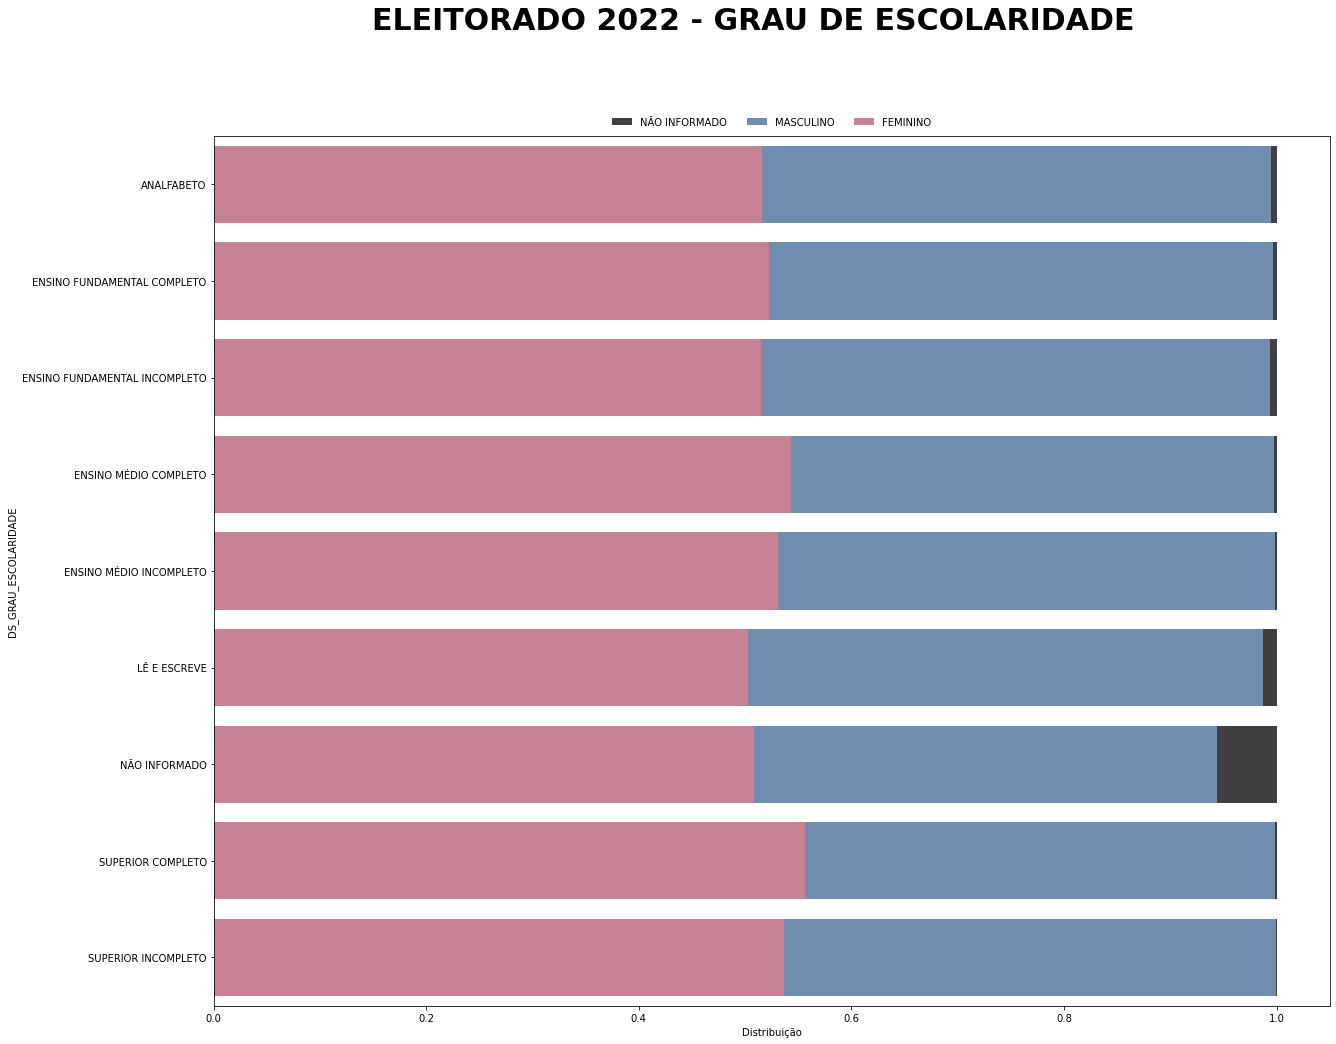

In [24]:
# Calculo a distribuição entre faixa etária e gênero para plotar o gráfico
distribution = pd.crosstab(df.DS_GRAU_ESCOLARIDADE, df.DS_GENERO, normalize='index')
colors=['#404040','#658cbb', '#d1768f' ]

figura = plt.figure(figsize=(20,16))
plot = sns.barplot(data=distribution.cumsum(axis=1).stack().reset_index(name='Distribuição'),
            x='Distribuição', 
            y='DS_GRAU_ESCOLARIDADE', 
            hue='DS_GENERO', 
            palette=colors,
            hue_order = distribution.columns[::-1], 
            dodge=False)

plt.gcf().text(.5, 0.98, "ELEITORADO 2022 - GRAU DE ESCOLARIDADE", fontsize = 30, color='Black' ,ha='center', va='center', weight='bold')
sns.move_legend(
    plot, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

'''for i in plot.patches:
    plot.annotate("{:.2f}".format(i.get_width()),
                  (i.get_width()-i.get_width()/2, i.get_y()),
                  ha='center', 
                  va='top', 
                  fontsize='20',
                  color='black', 
                  xytext=(0,-7),
                  textcoords='offset points')    '''
    
plt.show()

## Faixa Etária por grau de escolaridade

In [25]:
distribution = pd.crosstab(df.DS_FAIXA_ETARIA, df.DS_GRAU_ESCOLARIDADE, normalize='index')
distribution = distribution[['ANALFABETO','LÊ E ESCREVE', 'ENSINO FUNDAMENTAL INCOMPLETO','ENSINO FUNDAMENTAL COMPLETO','ENSINO MÉDIO INCOMPLETO','ENSINO MÉDIO COMPLETO','SUPERIOR INCOMPLETO','SUPERIOR COMPLETO']]
distribution

DS_GRAU_ESCOLARIDADE,ANALFABETO,LÊ E ESCREVE,ENSINO FUNDAMENTAL INCOMPLETO,ENSINO FUNDAMENTAL COMPLETO,ENSINO MÉDIO INCOMPLETO,ENSINO MÉDIO COMPLETO,SUPERIOR INCOMPLETO,SUPERIOR COMPLETO
DS_FAIXA_ETARIA,,,,,,,,
100 anos ou mais,0.294482,0.291460,0.182231,0.080526,0.025857,0.060163,0.009663,0.039425
16 anos,0.019687,0.055136,0.222184,0.210690,0.322740,0.125297,0.041589,0.002677
17 anos,0.023868,0.058207,0.184381,0.177619,0.287670,0.183200,0.077403,0.007653
18 anos,0.031277,0.050255,0.165446,0.149610,0.236806,0.220491,0.119924,0.026191
19 anos,0.036699,0.049479,0.169100,0.141563,0.221074,0.226527,0.124868,0.030690
20 anos,0.040451,0.048346,0.168991,0.140663,0.216310,0.222799,0.132352,0.030088
21 a 24 anos,0.057775,0.056523,0.151569,0.135528,0.178406,0.191129,0.139774,0.089296
25 a 29 anos,0.052815,0.058193,0.145076,0.129914,0.158036,0.179717,0.139708,0.136541
30 a 34 anos,0.054401,0.067880,0.147687,0.128585,0.147747,0.174898,0.134174,0.144627


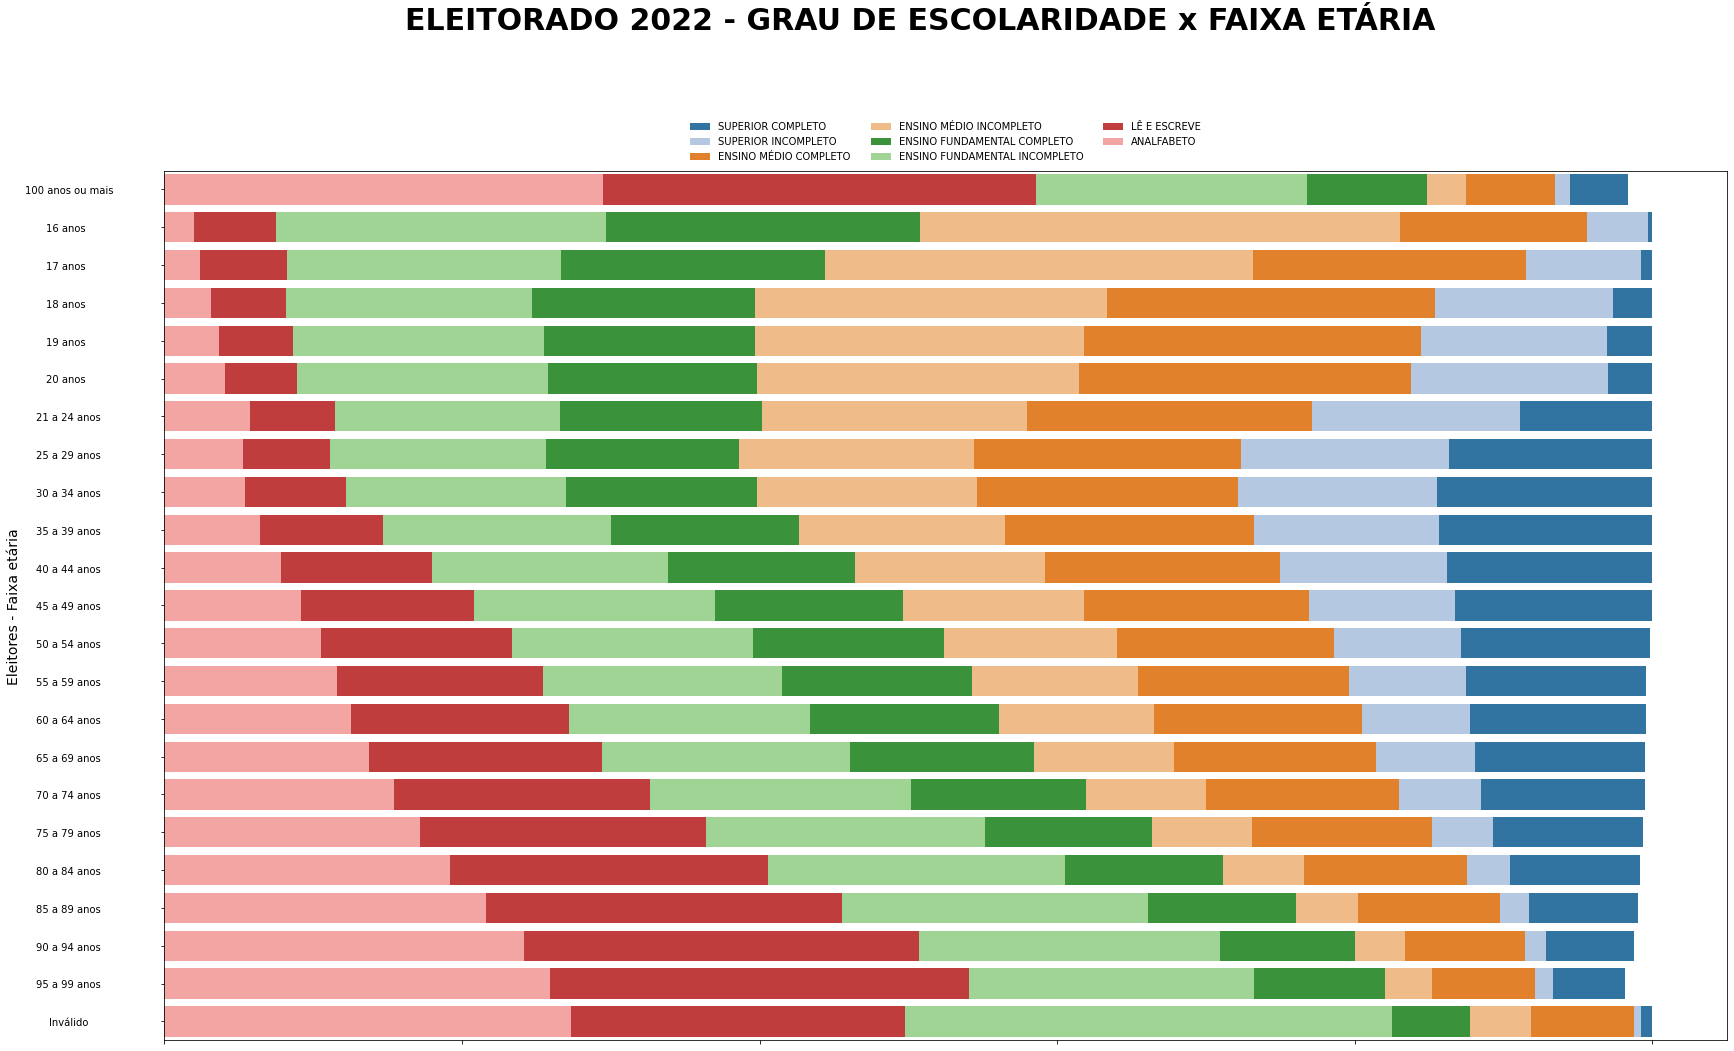

In [26]:
figura = plt.figure(figsize=(28,16))
plot = sns.barplot(data=distribution.cumsum(axis=1).stack().reset_index(name='Distribuição'),
            x='Distribuição', 
            y='DS_FAIXA_ETARIA', 
            hue='DS_GRAU_ESCOLARIDADE', 
            palette="tab20",
            hue_order = distribution.columns[::-1],   # reverse hue order so that the taller bars got plotted first
            dodge=False)
   
plt.gcf().text(.5, 1.01, "ELEITORADO 2022 - GRAU DE ESCOLARIDADE x FAIXA ETÁRIA", fontsize = 30, color='Black' ,ha='center', va='center', weight='bold')

plt.ylabel("Eleitores - Faixa etária", size = 14)  
plot.set(xticklabels=[])
plot.set(xlabel=None)

sns.move_legend(
    plot, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
plt.show()

## Grau de escolaridade por estado civil

In [27]:
distribution = pd.crosstab(df.DS_ESTADO_CIVIL, df.DS_GRAU_ESCOLARIDADE, normalize='index')
distribution = distribution[['ANALFABETO','LÊ E ESCREVE', 'ENSINO FUNDAMENTAL INCOMPLETO','ENSINO FUNDAMENTAL COMPLETO','ENSINO MÉDIO INCOMPLETO','ENSINO MÉDIO COMPLETO','SUPERIOR INCOMPLETO','SUPERIOR COMPLETO']]
distribution

DS_GRAU_ESCOLARIDADE,ANALFABETO,LÊ E ESCREVE,ENSINO FUNDAMENTAL INCOMPLETO,ENSINO FUNDAMENTAL COMPLETO,ENSINO MÉDIO INCOMPLETO,ENSINO MÉDIO COMPLETO,SUPERIOR INCOMPLETO,SUPERIOR COMPLETO
DS_ESTADO_CIVIL,,,,,,,,
CASADO,0.113797,0.128630,0.150427,0.128673,0.124213,0.140303,0.090779,0.117343
DIVORCIADO,0.077472,0.120445,0.176395,0.120881,0.111170,0.170145,0.087120,0.136039
NÃO INFORMADO,0.158559,0.326501,0.200781,0.093385,0.043418,0.074116,0.018387,0.027424
SEPARADO JUDICIALMENTE,0.097262,0.140861,0.210813,0.112964,0.100004,0.166723,0.062458,0.107765
SOLTEIRO,0.123952,0.125465,0.154715,0.131389,0.130473,0.137253,0.096195,0.097297
VIÚVO,0.159715,0.180290,0.200864,0.108417,0.079246,0.138105,0.040172,0.091501


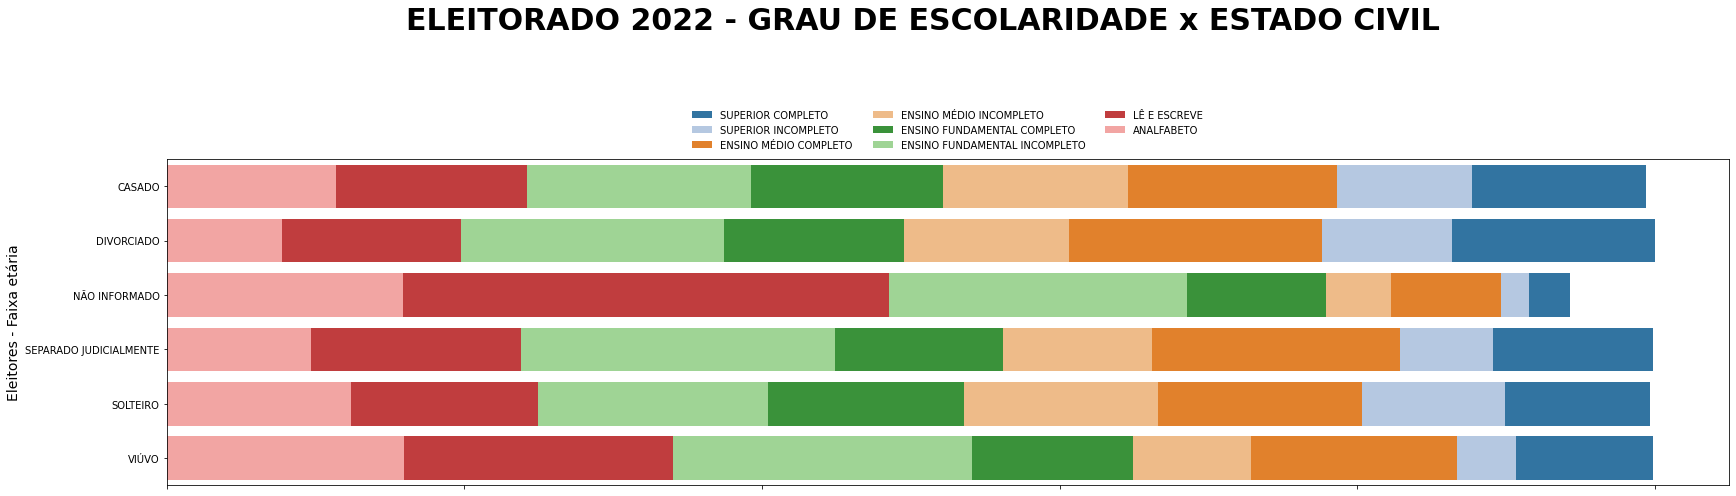

In [28]:
figura = plt.figure(figsize=(28,6))
plot = sns.barplot(data=distribution.cumsum(axis=1).stack().reset_index(name='Distribuição'),
            x='Distribuição', 
            y='DS_ESTADO_CIVIL', 
            hue='DS_GRAU_ESCOLARIDADE', 
            palette="tab20",
            hue_order = distribution.columns[::-1],   # reverse hue order so that the taller bars got plotted first
            dodge=False)
   
plt.gcf().text(.5, 1.2, "ELEITORADO 2022 - GRAU DE ESCOLARIDADE x ESTADO CIVIL", fontsize = 30, color='Black' ,ha='center', va='center', weight='bold')

plt.ylabel("Eleitores - Faixa etária", size = 14)  
plot.set(xticklabels=[])
plot.set(xlabel=None)

sns.move_legend(
    plot, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
plt.show()

## Grau de escolaridade por Estado

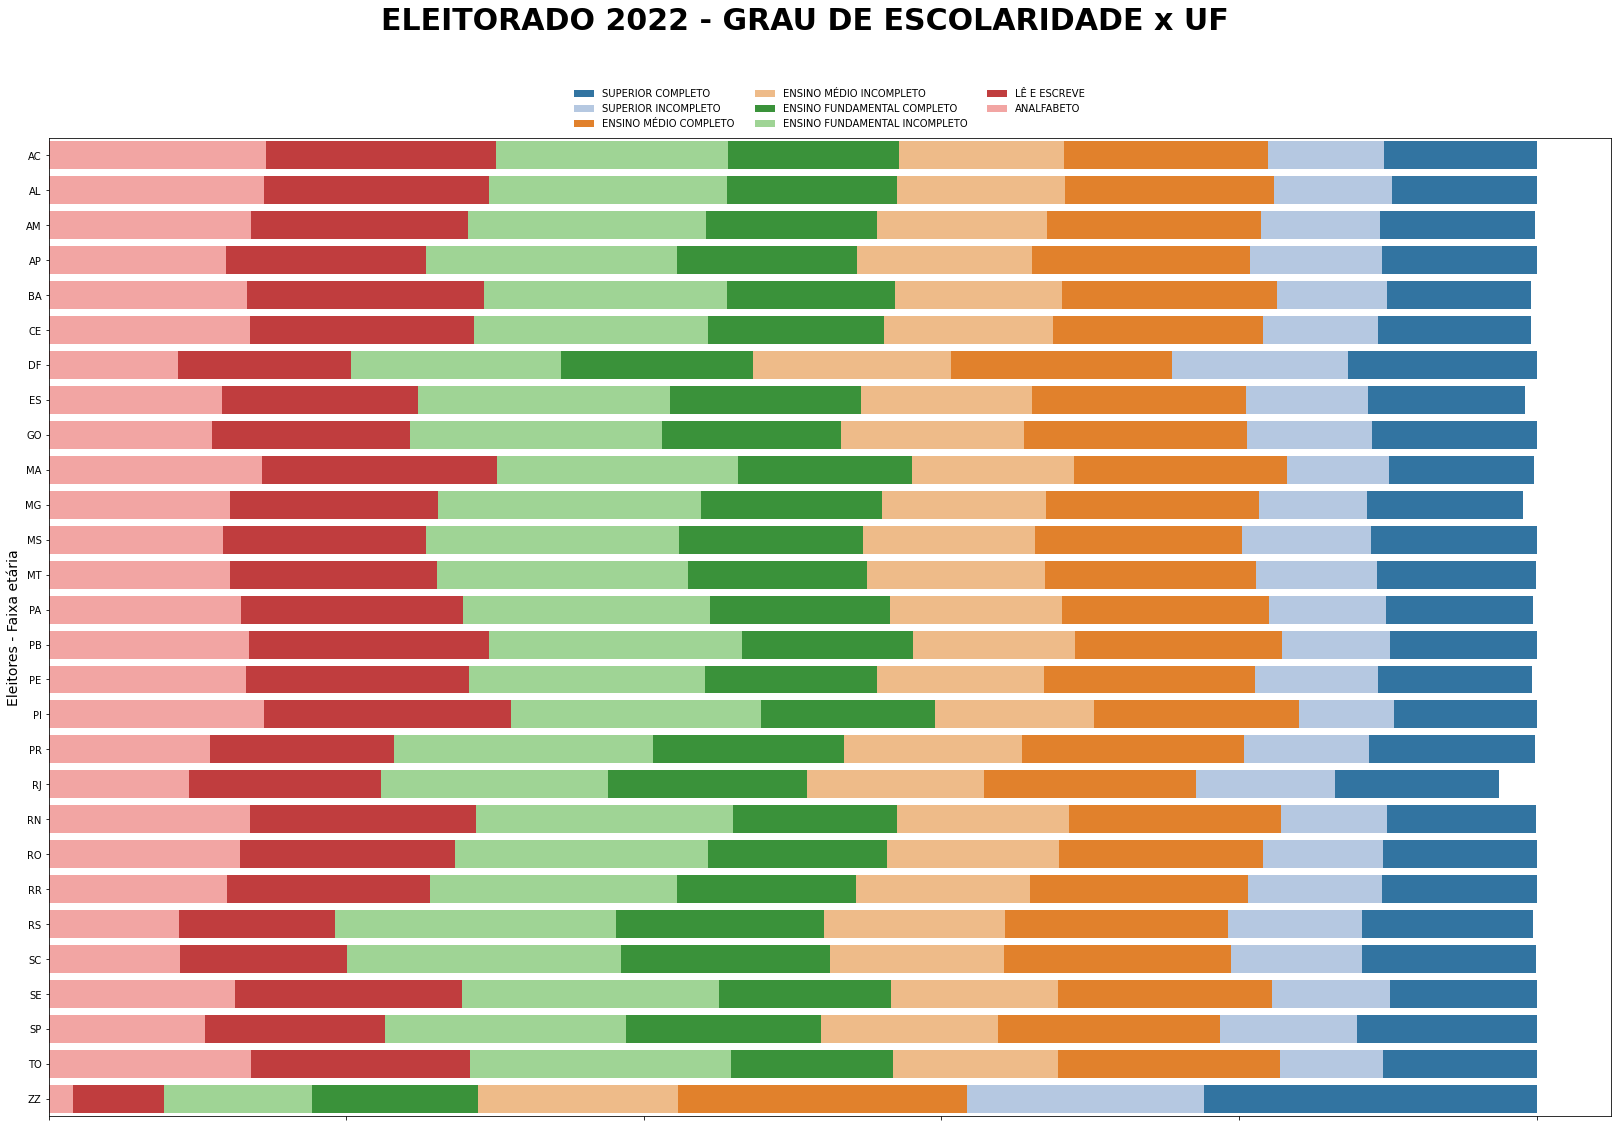

In [29]:
distribution = pd.crosstab(df.SG_UF, df.DS_GRAU_ESCOLARIDADE, normalize='index')
distribution = distribution[['ANALFABETO','LÊ E ESCREVE', 'ENSINO FUNDAMENTAL INCOMPLETO','ENSINO FUNDAMENTAL COMPLETO','ENSINO MÉDIO INCOMPLETO','ENSINO MÉDIO COMPLETO','SUPERIOR INCOMPLETO','SUPERIOR COMPLETO']]

figura = plt.figure(figsize=(28,18))
plot = sns.barplot(data=distribution.cumsum(axis=1).stack().reset_index(name='Distribuição'),
            x='Distribuição', 
            y='SG_UF', 
            hue='DS_GRAU_ESCOLARIDADE', 
            palette="tab20",
            hue_order = distribution.columns[::-1],   # reverse hue order so that the taller bars got plotted first
            dodge=False)
   
plt.gcf().text(.5, 0.97, "ELEITORADO 2022 - GRAU DE ESCOLARIDADE x UF", fontsize = 30, color='Black' ,ha='center', va='center', weight='bold')

plt.ylabel("Eleitores - Faixa etária", size = 14)  
plot.set(xticklabels=[])
plot.set(xlabel=None)

sns.move_legend(
    plot, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
plt.show()